station_name = "lanshanzui"
# 读取CSV文件
df = pd.read_csv(f'003-MCD18C2_061_20241027_插值填充_{station_name}.csv')

station_name = "tuoshan"
# 读取CSV文件
df = pd.read_csv(f'003-MCD18C2_061_20241104_插值填充_{station_name}.csv')

station_name = "乌龟山南"
# 读取CSV文件
df = pd.read_csv(f'003-MCD18C2_061_20241122_插值填充_{station_name}.csv')

station_name = "五里湖心"
# 读取CSV文件
df = pd.read_csv(f'003-MCD18C2_061_20241125_插值填充_{station_name}.csv')

station_name = "胥湖心"
# 读取CSV文件
df = pd.read_csv(f'003-MCD18C2_061_20241123_插值填充_{station_name}.csv')

station_name = "锡东水厂"
# 读取CSV文件
df = pd.read_csv(f'003-MCD18C2_061_20241124_插值填充_{station_name}.csv')

# 英文站点名转中文字典
station_name_map = {
    'lanshanzui': '兰山嘴',
    'tuoshan': '拖山'
}

藻密度与其他变量的相关性


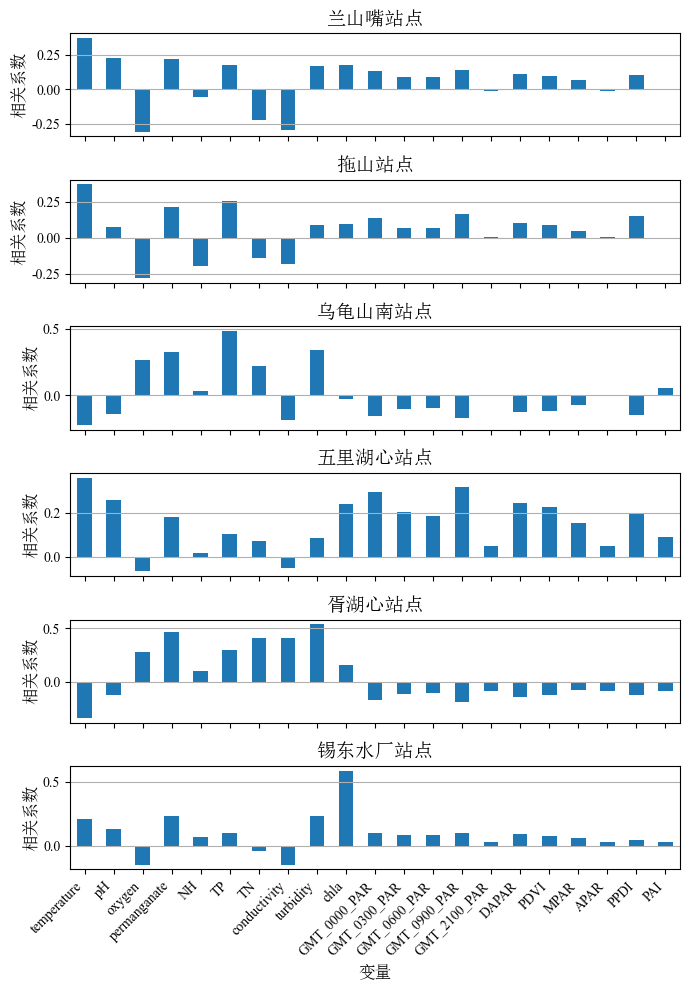

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 分别设置中英文字体,并设置较大字号
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=14)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=14)

# 英文站点名转中文字典
station_name_map = {
    'lanshanzui': '兰山嘴',
    'tuoshan': '拖山'
}

# 创建一个大图,包含6个子图
fig = plt.figure(figsize=(7, 10))

# 定义所有站点名称
station_names = ["lanshanzui", "tuoshan", "乌龟山南", "五里湖心", "胥湖心", "锡东水厂"]
file_dates = ["20241027", "20241104", "20241122", "20241125", "20241123", "20241124"]

# 固定变量顺序
fixed_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
              'conductivity', 'turbidity', 'chla', 'GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 
              'GMT_0900_PAR', 'GMT_2100_PAR',
              'DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']

print("藻密度与其他变量的相关性")

# 遍历每个站点
for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates), 1):
    # 读取CSV文件
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{station_name}.csv')
    
    # 将日期列转换为datetime格式
    df['date'] = pd.to_datetime(df['date'])
    
    # 获取日期范围
    date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
    
    # 创建完整的日期DataFrame
    complete_df = pd.DataFrame({'date': date_range})
    
    # 与原始数据合并，保留所有日期
    df_filled = pd.merge(complete_df, df, on='date', how='left')
    
    # 将缺失值填充为NaN
    df_filled = df_filled.fillna(np.nan)
    
    # 读取站点数据
    station_df = pd.read_csv(f'001-{station_name}.csv')
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 将两个数据集按日期合并
    merged_df = pd.merge(df_filled, station_df, on='date', how='left')
    # 计算藻密度与其他变量的相关性
    correlations = merged_df[fixed_vars + ['density']].corr()['density']
    
    # 创建子图
    ax = fig.add_subplot(6, 1, idx)
    correlations[:-1].plot(kind='bar', ax=ax)  # 不绘制最后一个density的相关性
    
    # 设置标题和标签
    station_display = station_name_map.get(station_name, station_name)  # 使用中文名如果存在
    ax.set_title(f'{station_display}站点', fontproperties=chinese_font, fontsize=14)
    
    if idx == 6:  # 只在最后一个子图显示x轴标签
        plt.xticks(rotation=45, ha='right', fontproperties=english_font, fontsize=10)
        ax.set_xlabel('变量', fontproperties=chinese_font, fontsize=12)
    else:
        ax.set_xticklabels([])
        ax.set_xlabel('')
        
    ax.set_ylabel('相关系数', fontproperties=chinese_font, fontsize=12)
    plt.yticks(fontproperties=english_font, fontsize=10)
    ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

PAR相关变量与藻密度的相关性 | 光合指数相关性


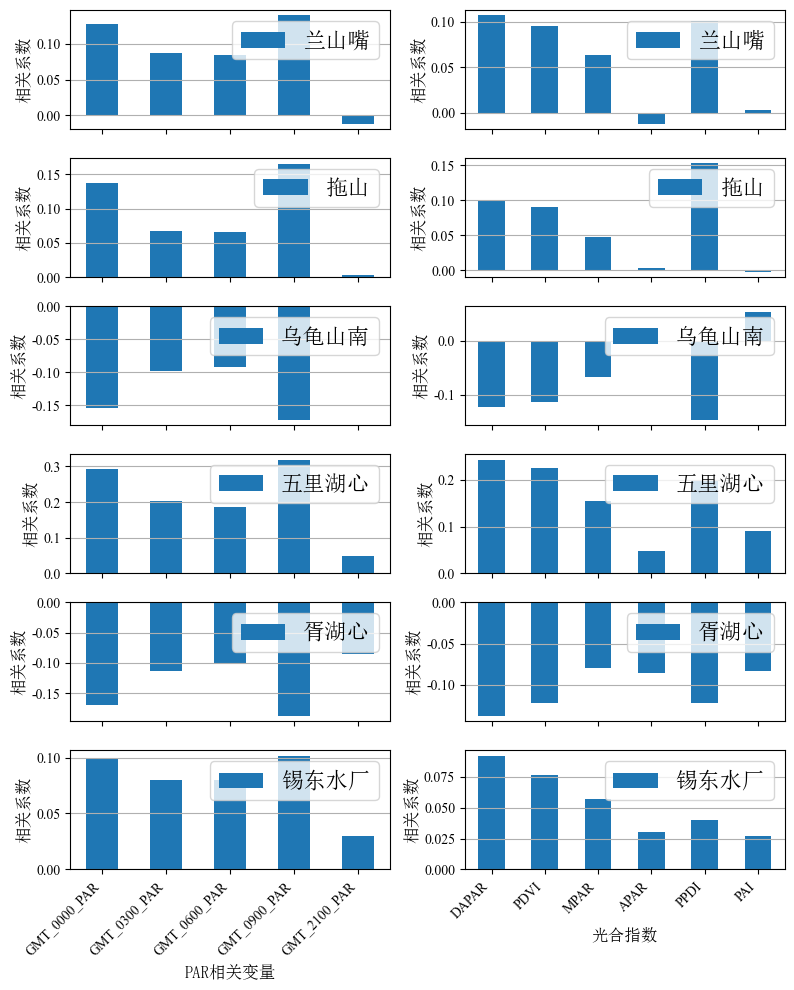

In [13]:
# 创建一个大图,包含PAR相关变量和光合指数相关性图
print("PAR相关变量与藻密度的相关性 | 光合指数相关性")
fig = plt.figure(figsize=(8, 10))

# 定义固定的PAR变量和光合指数顺序
fixed_par_vars = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR', 'GMT_2100_PAR']
fixed_photo_vars = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']

for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates), 1):
    # 读取CSV文件
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    
    # 将日期列转换为datetime格式
    df['date'] = pd.to_datetime(df['date'])
    
    # 获取日期范围
    date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
    
    # 创建完整的日期DataFrame
    complete_df = pd.DataFrame({'date': date_range})
    
    # 与原始数据合并，保留所有日期
    df_filled = pd.merge(complete_df, df, on='date', how='left')
    
    # 将缺失值填充为NaN
    df_filled = df_filled.fillna(np.nan)
    
    # 读取站点数据
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 将两个数据集按日期合并
    merged_df = pd.merge(df_filled, station_df, on='date', how='left')
    
    # 左侧PAR相关变量图
    ax1 = fig.add_subplot(6, 2, 2*idx-1)
    par_correlations = pd.Series([merged_df[var].corr(merged_df['density']) for var in fixed_par_vars],
                                index=fixed_par_vars)
    par_correlations.plot(kind='bar', ax=ax1, label=station_name)
    
    if idx == 6:
        plt.sca(ax1)
        plt.xticks(rotation=45, ha='right')
        ax1.set_xlabel('PAR相关变量', fontproperties=chinese_font, fontsize=12)
    else:
        ax1.set_xticklabels([])
        ax1.set_xlabel('')
    ax1.set_ylabel('相关系数', fontproperties=chinese_font, fontsize=12)
    for label in ax1.get_xticklabels() + ax1.get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(10)
    ax1.grid(True, axis='y')
    # 使用中文站点名称
    legend_name = station_name
    if station_name == "lanshanzui":
        legend_name = "兰山嘴"
    elif station_name == "tuoshan":
        legend_name = "拖山"
    ax1.legend(prop=chinese_font, fontsize=6, loc='upper right', labels=[legend_name])
    
    # 右侧光合指数图
    ax2 = fig.add_subplot(6, 2, 2*idx)
    photo_correlations = pd.Series([merged_df[var].corr(merged_df['density']) for var in fixed_photo_vars],
                                  index=fixed_photo_vars)
    photo_correlations.plot(kind='bar', ax=ax2, label=legend_name)
    
    if idx == 6:
        plt.sca(ax2)
        plt.xticks(rotation=45, ha='right')
        ax2.set_xlabel('光合指数', fontproperties=chinese_font, fontsize=12)
    else:
        ax2.set_xticklabels([])
        ax2.set_xlabel('')
    ax2.set_ylabel('相关系数', fontproperties=chinese_font, fontsize=12)
    for label in ax2.get_xticklabels() + ax2.get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(10)
    ax2.grid(True, axis='y')
    ax2.legend(prop=chinese_font, fontsize=6, loc='upper right', labels=[legend_name])

plt.tight_layout()
plt.show()


水质参数与藻密度、叶绿素a PCA双标图分析


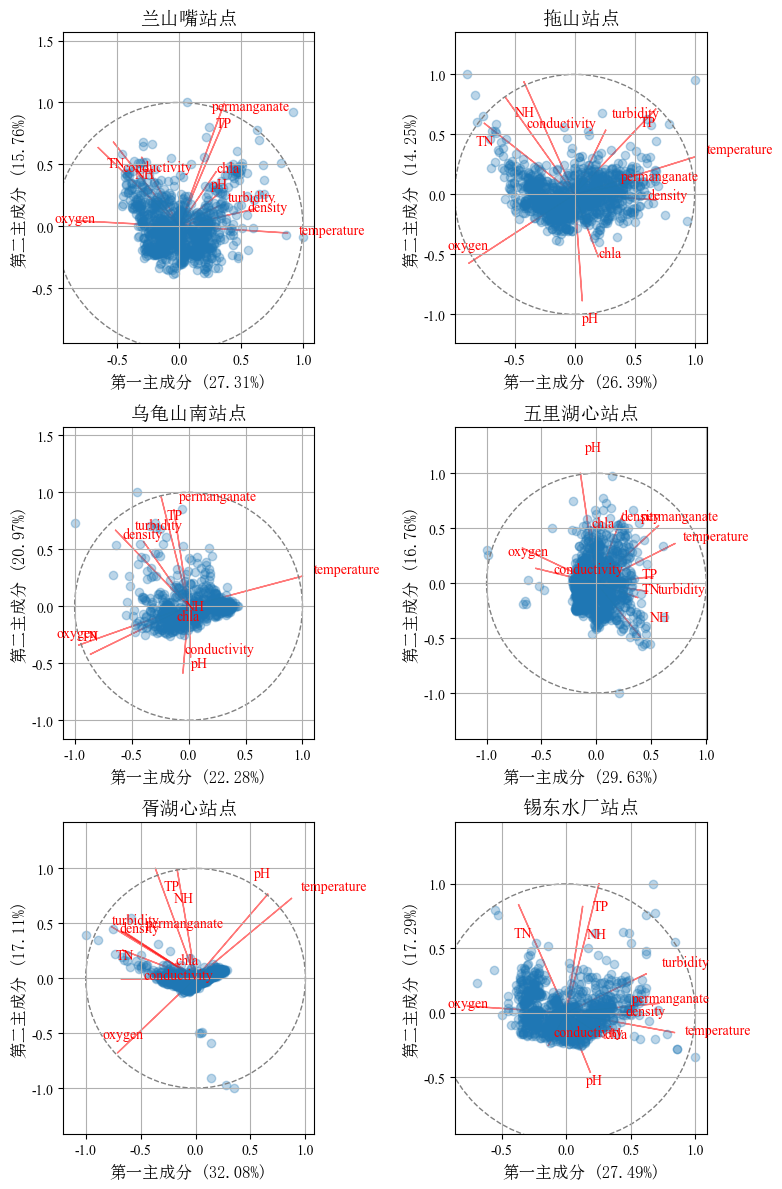

PAR参数与藻密度、叶绿素a PCA双标图分析


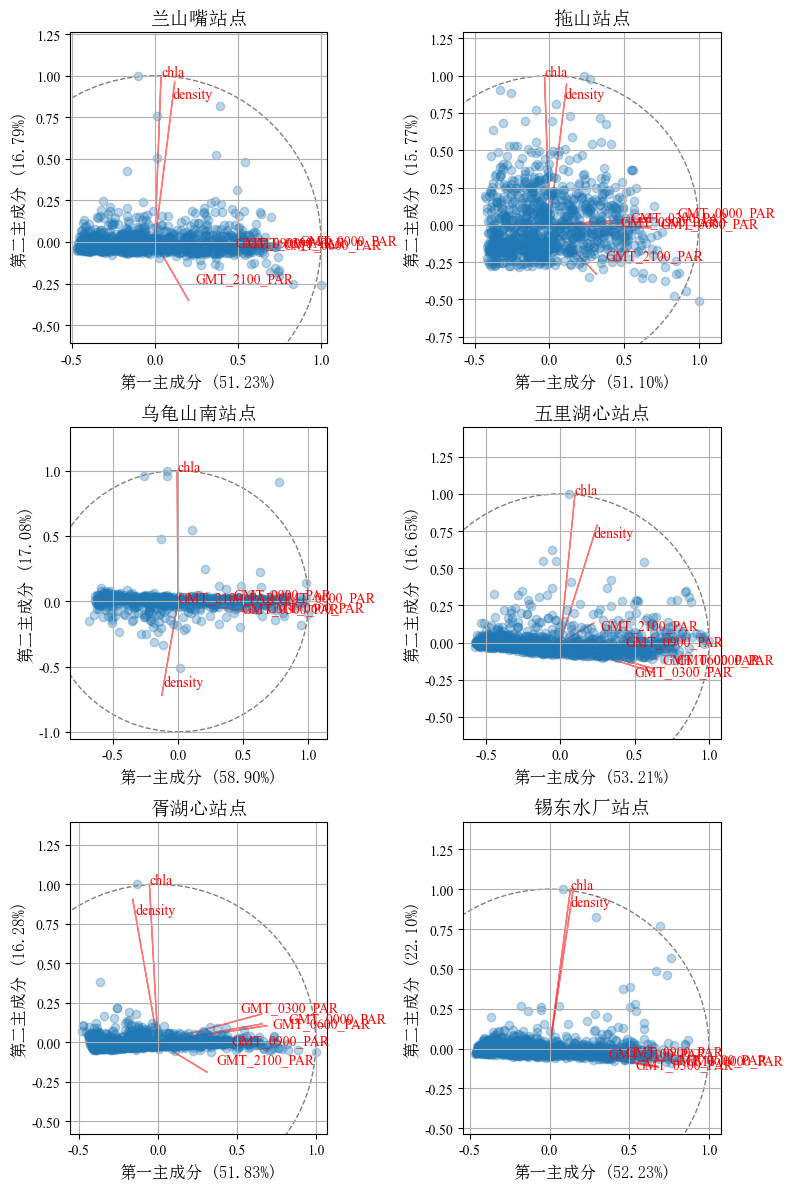

遥感指数与藻密度、叶绿素a PCA双标图分析


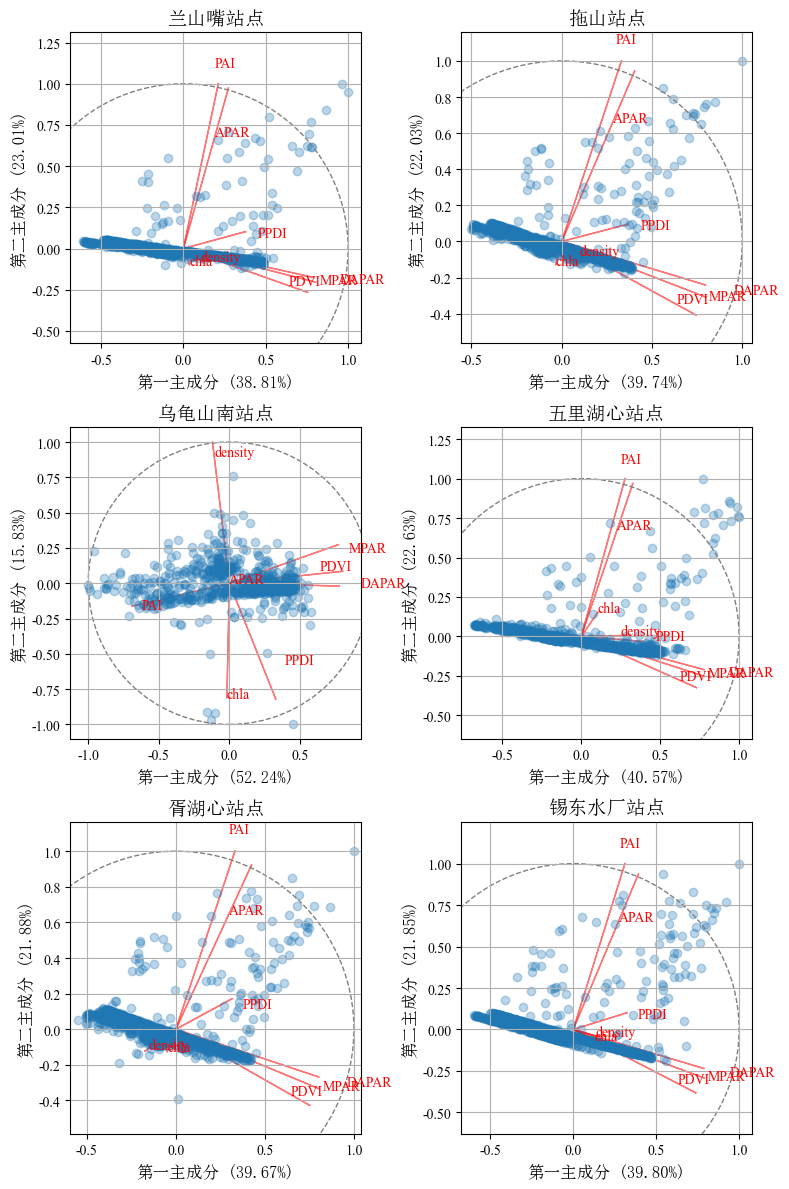

In [3]:
# 为每个站点创建PCA双标图 - 水质参数
print("水质参数与藻密度、叶绿素a PCA双标图分析")
fig1 = plt.figure(figsize=(8, 12))
correlation_vars1 = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 'conductivity', 'turbidity', 'density', 'chla']

for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates), 1):
    # 读取数据
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    
    # 转换日期格式
    df['date'] = pd.to_datetime(df['date'])
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 合并数据
    merged_df = pd.merge(df, station_df, on='date', how='inner')
    
    # 准备数据
    X = merged_df[correlation_vars1].dropna()
    X_scaled = StandardScaler().fit_transform(X)
    
    # 执行PCA
    pca = PCA()
    pca_result = pca.fit_transform(X_scaled)
    # 创建子图
    ax = fig1.add_subplot(3, 2, idx)
    
    # 绘制PCA双标图
    scale = np.max(np.abs(pca.components_[:2]))
    # 绘制变量向量,设置不同的文本偏移量
    text_offsets = {
        'temperature': (1.1, 1.1),
        'pH': (0.8, 1.2), 
        'oxygen': (1.2, 0.8),
        'permanganate': (0.7, 1.1),
        'NH': (1.2, 0.7),
        'TP': (0.8, 0.8),
        'TN': (1.1, 0.7),
        'conductivity': (0.7, 0.7),
        'turbidity': (1.2, 1.2),
        'density': (0.9, 0.9),
        'chla': (1.0, 1.0)
    }
    
    for i, var in enumerate(correlation_vars1):
        ax.arrow(0, 0,
                pca.components_[0, i] / scale,
                pca.components_[1, i] / scale,
                color='r', alpha=0.5)
        ax.text(pca.components_[0, i] / scale * text_offsets[var][0],
               pca.components_[1, i] / scale * text_offsets[var][1],
               var, color='r', fontproperties=english_font, fontsize=10)
    
    # 绘制样本点
    ax.scatter(pca_result[:, 0] / np.max(np.abs(pca_result[:, 0])),
              pca_result[:, 1] / np.max(np.abs(pca_result[:, 1])),
              alpha=0.3)
    if station_name == "lanshanzui":
        station_name = "兰山嘴"
    elif station_name == "tuoshan":
        station_name = "拖山"
    # 添加标题和轴标签
    ax.set_title(f'{station_name}站点', fontproperties=chinese_font, fontsize=14)
    ax.set_xlabel(f'第一主成分 ({pca.explained_variance_ratio_[0]:.2%})', 
                    fontproperties=chinese_font, fontsize=12)
    ax.set_ylabel(f'第二主成分 ({pca.explained_variance_ratio_[1]:.2%})', 
                  fontproperties=chinese_font, fontsize=12)
    
    # 设置刻度字体为英文字体
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(10)
    
    # 添加单位圆
    circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
    ax.add_artist(circle)
    ax.axis('equal')
    ax.grid(True)

plt.tight_layout()
plt.show()

# 为每个站点创建PCA双标图 - PAR参数
print("PAR参数与藻密度、叶绿素a PCA双标图分析")
fig2 = plt.figure(figsize=(8, 12))
correlation_vars2 = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR', 'GMT_2100_PAR', 'density', 'chla']

for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates), 1):
    # 读取数据
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    
    # 转换日期格式
    df['date'] = pd.to_datetime(df['date'])
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 合并数据
    merged_df = pd.merge(df, station_df, on='date', how='inner')
    
    # 准备数据
    X = merged_df[correlation_vars2].dropna()
    X_scaled = StandardScaler().fit_transform(X)
    
    # 执行PCA
    pca = PCA()
    pca_result = pca.fit_transform(X_scaled)
    # 创建子图
    ax = fig2.add_subplot(3, 2, idx)
    
    # 绘制PCA双标图
    scale = np.max(np.abs(pca.components_[:2]))
    # 绘制变量向量,设置不同的文本偏移量
    text_offsets = {
        'GMT_0000_PAR': (1.2, 1.2),
        'GMT_0300_PAR': (0.8, 1.1),
        'GMT_0600_PAR': (1.1, 0.8),
        'GMT_0900_PAR': (0.7, 0.7),
        'GMT_2100_PAR': (1.2, 0.7),
        'density': (0.9, 0.9),
        'chla': (1.0, 1.0)
    }
    
    for i, var in enumerate(correlation_vars2):
        ax.arrow(0, 0,
                pca.components_[0, i] / scale,
                pca.components_[1, i] / scale,
                color='r', alpha=0.5)
        ax.text(pca.components_[0, i] / scale * text_offsets[var][0],
               pca.components_[1, i] / scale * text_offsets[var][1],
               var, color='r', fontproperties=english_font, fontsize=10)
    
    # 绘制样本点
    ax.scatter(pca_result[:, 0] / np.max(np.abs(pca_result[:, 0])),
              pca_result[:, 1] / np.max(np.abs(pca_result[:, 1])),
              alpha=0.3)
    if station_name == "lanshanzui":
        station_name = "兰山嘴"
    elif station_name == "tuoshan":
        station_name = "拖山"
    # 添加标题和轴标签
    ax.set_title(f'{station_name}站点', fontproperties=chinese_font, fontsize=14)
    ax.set_xlabel(f'第一主成分 ({pca.explained_variance_ratio_[0]:.2%})', 
                    fontproperties=chinese_font, fontsize=12)
    ax.set_ylabel(f'第二主成分 ({pca.explained_variance_ratio_[1]:.2%})', 
                  fontproperties=chinese_font, fontsize=12)
    
    # 设置刻度字体为英文字体
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(10)
    
    # 添加单位圆
    circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
    ax.add_artist(circle)
    ax.axis('equal')
    ax.grid(True)

plt.tight_layout()
plt.show()

# 为每个站点创建PCA双标图 - 遥感指数
print("遥感指数与藻密度、叶绿素a PCA双标图分析")
fig3 = plt.figure(figsize=(8, 12))
correlation_vars3 = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI', 'density', 'chla']

for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates), 1):
    # 读取数据
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    
    # 转换日期格式
    df['date'] = pd.to_datetime(df['date'])
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 合并数据
    merged_df = pd.merge(df, station_df, on='date', how='inner')
    
    # 准备数据
    X = merged_df[correlation_vars3].dropna()
    X_scaled = StandardScaler().fit_transform(X)
    
    # 执行PCA
    pca = PCA()
    pca_result = pca.fit_transform(X_scaled)
    # 创建子图
    ax = fig3.add_subplot(3, 2, idx)
    
    # 绘制PCA双标图
    scale = np.max(np.abs(pca.components_[:2]))
    # 绘制变量向量,设置不同的文本偏移量
    text_offsets = {
        'DAPAR': (1.2, 1.2),
        'PDVI': (0.8, 1.1),
        'MPAR': (1.1, 0.8),
        'APAR': (0.7, 0.7),
        'PPDI': (1.2, 0.7),
        'PAI': (0.9, 1.1),
        'density': (0.9, 0.9),
        'chla': (1.0, 1.0)
    }
    
    for i, var in enumerate(correlation_vars3):
        ax.arrow(0, 0,
                pca.components_[0, i] / scale,
                pca.components_[1, i] / scale,
                color='r', alpha=0.5)
        ax.text(pca.components_[0, i] / scale * text_offsets[var][0],
               pca.components_[1, i] / scale * text_offsets[var][1],
               var, color='r', fontproperties=english_font, fontsize=10)
    
    # 绘制样本点
    ax.scatter(pca_result[:, 0] / np.max(np.abs(pca_result[:, 0])),
              pca_result[:, 1] / np.max(np.abs(pca_result[:, 1])),
              alpha=0.3)
    if station_name == "lanshanzui":
        station_name = "兰山嘴"
    elif station_name == "tuoshan":
        station_name = "拖山"
    # 添加标题和轴标签
    ax.set_title(f'{station_name}站点', fontproperties=chinese_font, fontsize=14)
    ax.set_xlabel(f'第一主成分 ({pca.explained_variance_ratio_[0]:.2%})', 
                    fontproperties=chinese_font, fontsize=12)
    ax.set_ylabel(f'第二主成分 ({pca.explained_variance_ratio_[1]:.2%})', 
                  fontproperties=chinese_font, fontsize=12)
    
    # 设置刻度字体为英文字体
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(10)
    
    # 添加单位圆
    circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
    ax.add_artist(circle)
    ax.axis('equal')
    ax.grid(True)

plt.tight_layout()
plt.show()

叶绿素a与其他变量的相关性


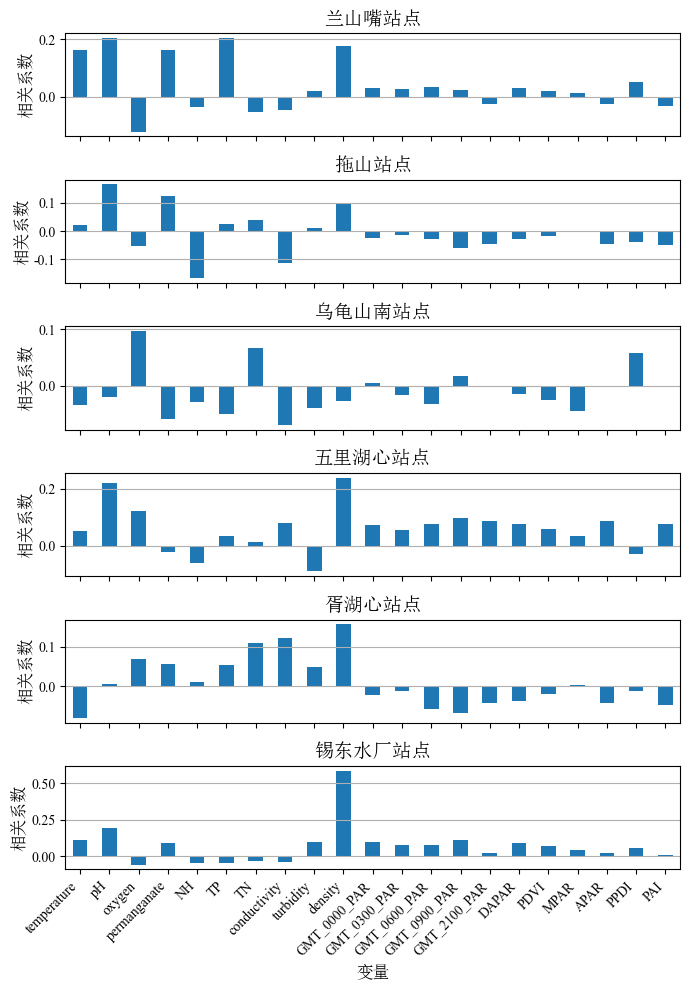

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 分别设置中英文字体,并设置较大字号
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=16)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=16)

# 定义固定的变量顺序
fixed_correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                       'conductivity', 'turbidity', 'density', 'GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 
                       'GMT_0900_PAR', 'GMT_2100_PAR',
                       'DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']

# 定义所有站点名称和对应的日期
station_names = ["兰山嘴", "拖山", "乌龟山南", "五里湖心", "胥湖心", "锡东水厂"]
file_dates = ["20241027", "20241104", "20241122", "20241125", "20241123", "20241124"]

# 创建一个大图,包含6个子图
fig = plt.figure(figsize=(7, 10))

print("叶绿素a与其他变量的相关性")

# 遍历每个站点
for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates), 1):
    # 读取CSV文件
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    
    # 将日期列转换为datetime格式
    df['date'] = pd.to_datetime(df['date'])
    
    # 获取日期范围
    date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
    
    # 创建完整的日期DataFrame
    complete_df = pd.DataFrame({'date': date_range})
    
    # 与原始数据合并，保留所有日期
    df_filled = pd.merge(complete_df, df, on='date', how='left')
    
    # 将缺失值填充为NaN
    df_filled = df_filled.fillna(np.nan)
    
    # 读取站点数据
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 将两个数据集按日期合并
    merged_df = pd.merge(df_filled, station_df, on='date', how='left')
    
    # 计算叶绿素与其他变量的相关性,按固定顺序
    correlations = pd.Series([merged_df[var].corr(merged_df['chla']) for var in fixed_correlation_vars], 
                           index=fixed_correlation_vars)

    # 创建子图
    ax = fig.add_subplot(6, 1, idx)
    correlations.plot(kind='bar', ax=ax)
    
    # 设置标题和标签
    ax.set_title(f'{station_name}站点', fontproperties=chinese_font, fontsize=14)
    
    if idx == 6:  # 只在最后一个子图显示x轴标签
        plt.xticks(rotation=45, ha='right')
        ax.set_xlabel('变量', fontproperties=chinese_font, fontsize=12)
    else:
        ax.set_xticklabels([])
        ax.set_xlabel('')
    
    ax.set_ylabel('相关系数', fontproperties=chinese_font, fontsize=12)
    
    # 设置刻度标签字体
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(10)
    
    ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


PAR相关变量与叶绿素的相关性
光合指数相关性


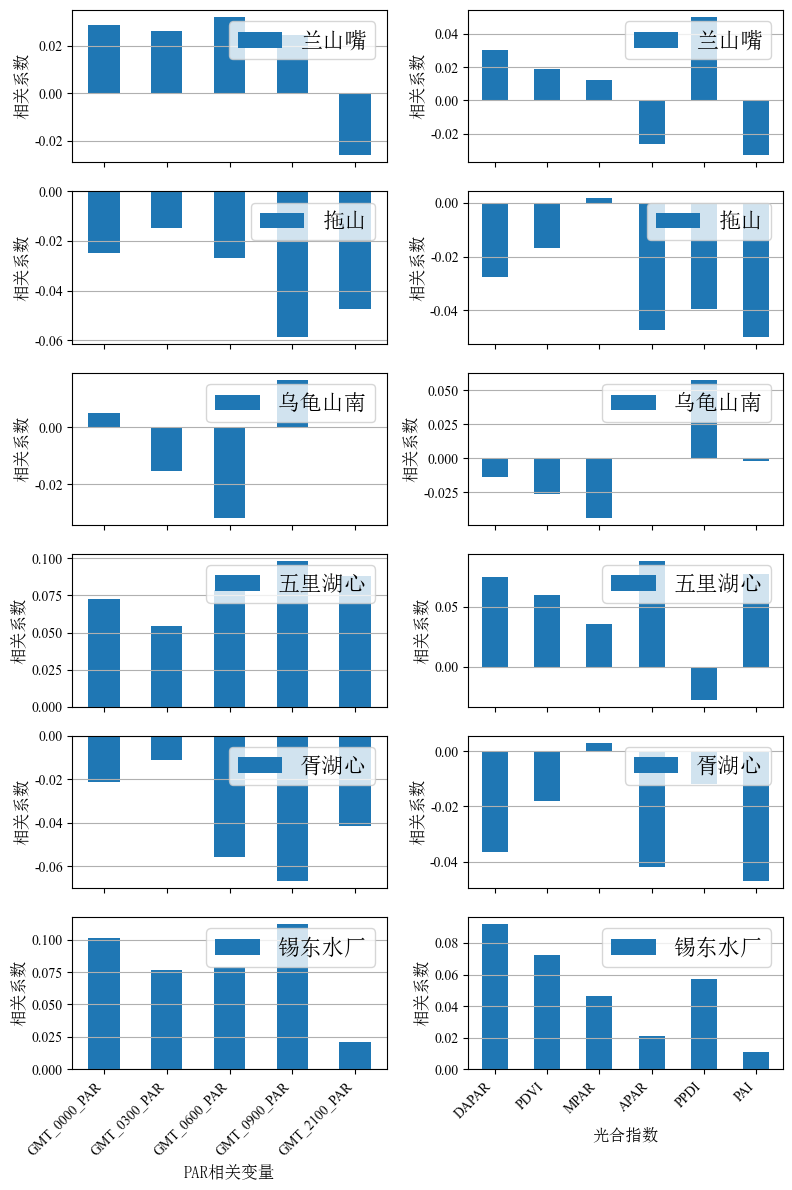

In [15]:

# 创建一个大图,包含PAR相关变量和光合指数相关性图
print("PAR相关变量与叶绿素的相关性")
print("光合指数相关性")
fig = plt.figure(figsize=(8, 12))

# 定义固定的PAR变量和光合指数顺序
fixed_par_vars = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR', 'GMT_2100_PAR']
fixed_photo_vars = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']

for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates), 1):
    # 读取CSV文件
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    
    # 将日期列转换为datetime格式
    df['date'] = pd.to_datetime(df['date'])
    
    # 获取日期范围
    date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
    
    # 创建完整的日期DataFrame
    complete_df = pd.DataFrame({'date': date_range})
    
    # 与原始数据合并，保留所有日期
    df_filled = pd.merge(complete_df, df, on='date', how='left')
    
    # 将缺失值填充为NaN
    df_filled = df_filled.fillna(np.nan)
    
    # 读取站点数据
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 将两个数据集按日期合并
    merged_df = pd.merge(df_filled, station_df, on='date', how='left')
    
    # 左侧PAR相关变量图
    ax1 = fig.add_subplot(6, 2, 2*idx-1)
    par_correlations = pd.Series([merged_df[var].corr(merged_df['chla']) for var in fixed_par_vars],
                                index=fixed_par_vars)
    par_correlations.plot(kind='bar', ax=ax1, label=station_name)
    
    if idx == 6:
        plt.sca(ax1)
        plt.xticks(rotation=45, ha='right')
        ax1.set_xlabel('PAR相关变量', fontproperties=chinese_font, fontsize=12)
    else:
        ax1.set_xticklabels([])
        ax1.set_xlabel('')
    ax1.set_ylabel('相关系数', fontproperties=chinese_font, fontsize=12)
    for label in ax1.get_xticklabels() + ax1.get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(10)
    ax1.grid(True, axis='y')
    ax1.legend(prop=chinese_font, fontsize=6, loc='upper right')
    
    # 右侧光合指数图
    ax2 = fig.add_subplot(6, 2, 2*idx)
    photo_correlations = pd.Series([merged_df[var].corr(merged_df['chla']) for var in fixed_photo_vars],
                                  index=fixed_photo_vars)
    photo_correlations.plot(kind='bar', ax=ax2, label=station_name)
    
    if idx == 6:
        plt.sca(ax2)
        plt.xticks(rotation=45, ha='right')
        ax2.set_xlabel('光合指数', fontproperties=chinese_font, fontsize=12)
    else:
        ax2.set_xticklabels([])
        ax2.set_xlabel('')
    ax2.set_ylabel('相关系数', fontproperties=chinese_font, fontsize=12)
    for label in ax2.get_xticklabels() + ax2.get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(10)
    ax2.grid(True, axis='y')
    ax2.legend(prop=chinese_font, fontsize=6, loc='upper right')

plt.tight_layout()
plt.show()


水质参数PCA双标图分析


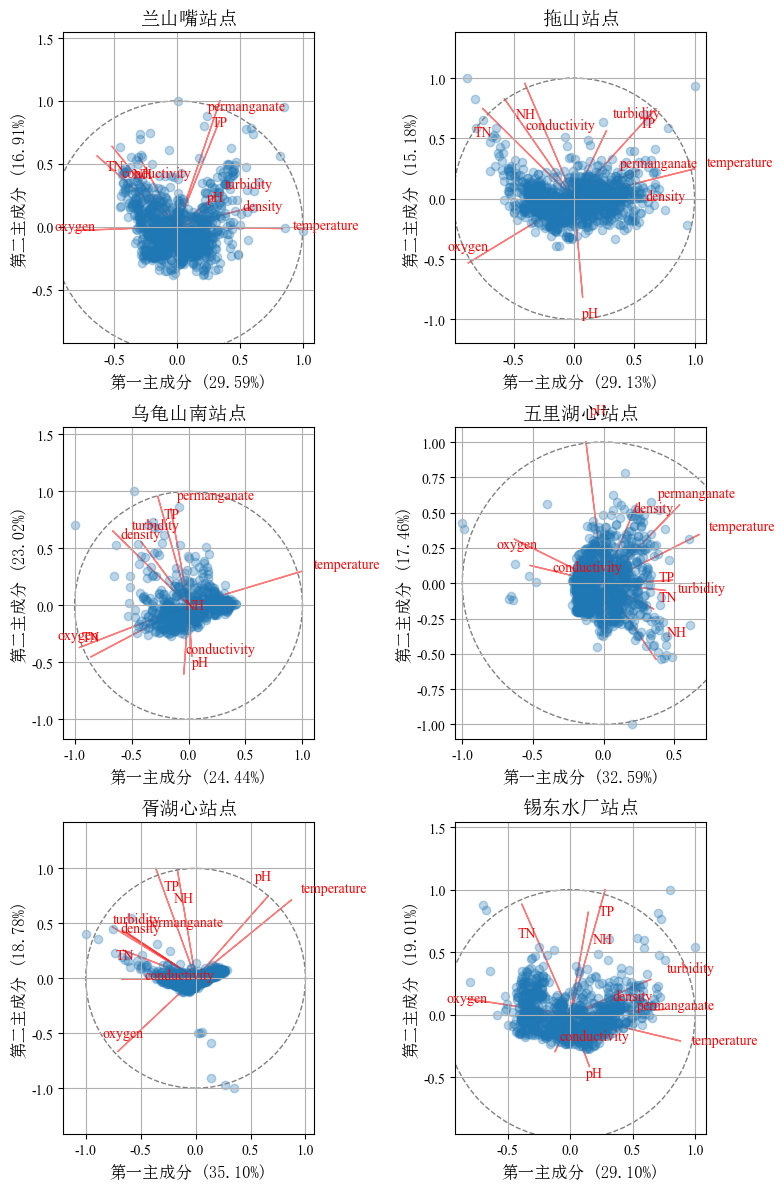

PAR参数PCA双标图分析


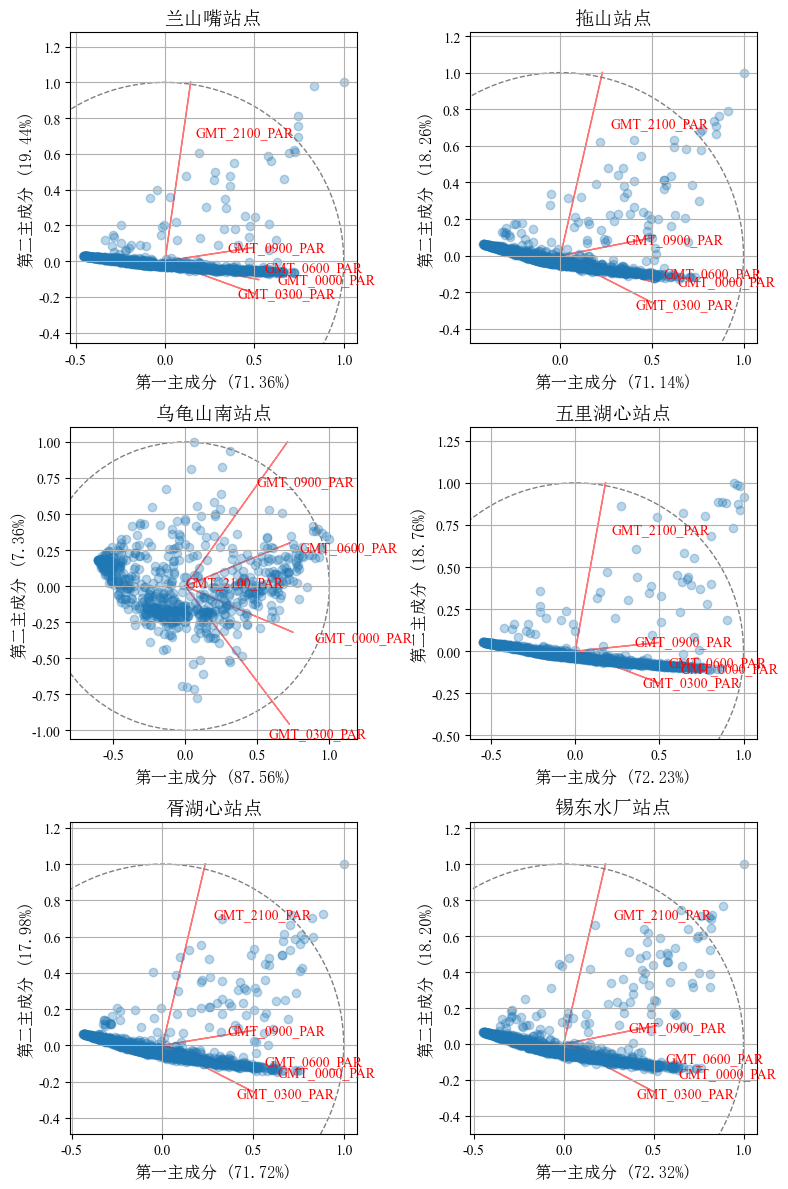

遥感指数PCA双标图分析


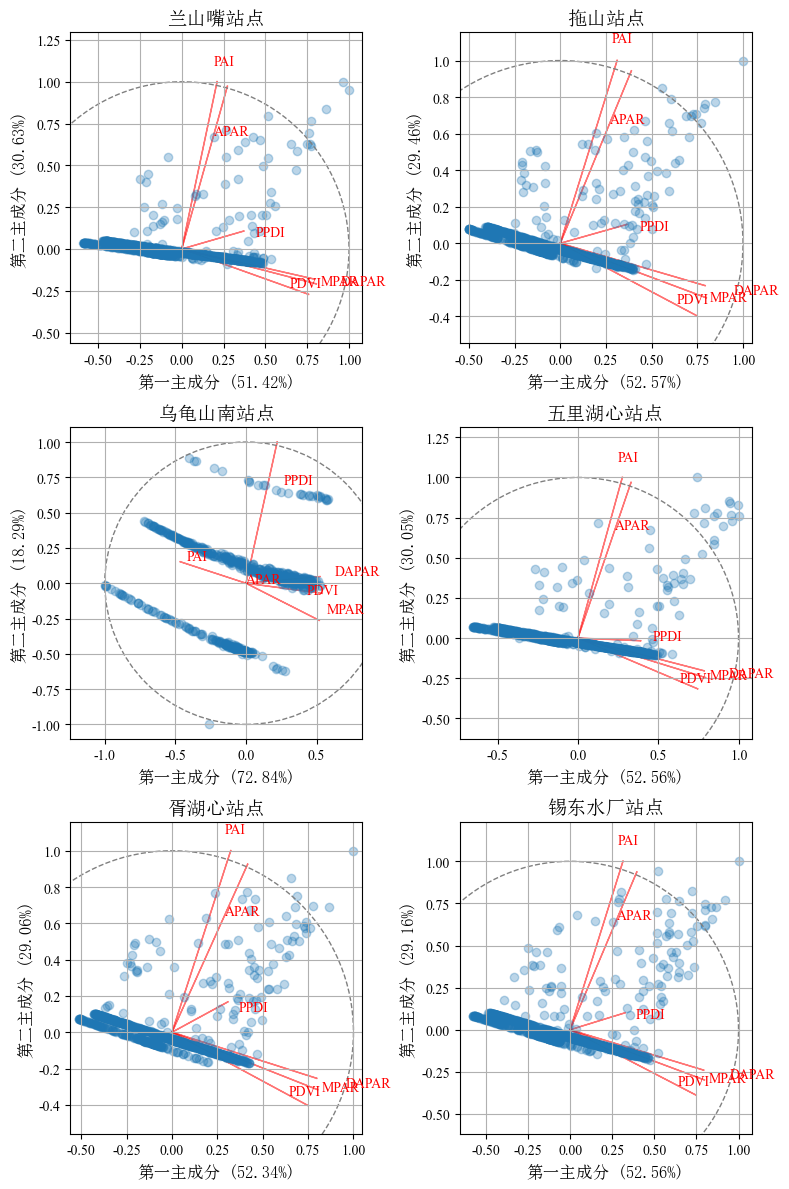

In [6]:
# 为每个站点创建PCA双标图
print("水质参数PCA双标图分析")
fig1 = plt.figure(figsize=(8, 12))
correlation_vars1 = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 'conductivity', 'turbidity', 'density']

for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates), 1):
    # 读取数据
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    
    # 转换日期格式
    df['date'] = pd.to_datetime(df['date'])
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 合并数据
    merged_df = pd.merge(df, station_df, on='date', how='inner')
    
    # 准备数据
    X = merged_df[correlation_vars1].dropna()
    X_scaled = StandardScaler().fit_transform(X)
    
    # 执行PCA
    pca = PCA()
    pca_result = pca.fit_transform(X_scaled)
    # 创建子图
    ax = fig1.add_subplot(3, 2, idx)
    
    # 绘制PCA双标图
    scale = np.max(np.abs(pca.components_[:2]))
    # 绘制变量向量,设置不同的文本偏移量
    text_offsets = {
        'temperature': (1.1, 1.1),
        'pH': (0.8, 1.2), 
        'oxygen': (1.2, 0.8),
        'permanganate': (0.7, 1.1),
        'NH': (1.2, 0.7),
        'TP': (0.8, 0.8),
        'TN': (1.1, 0.7),
        'conductivity': (0.7, 0.7),
        'turbidity': (1.2, 1.2),
        'density': (0.9, 0.9)
    }
    
    for i, var in enumerate(correlation_vars1):
        ax.arrow(0, 0,
                pca.components_[0, i] / scale,
                pca.components_[1, i] / scale,
                color='r', alpha=0.5)
        ax.text(pca.components_[0, i] / scale * text_offsets[var][0],
               pca.components_[1, i] / scale * text_offsets[var][1],
               var, color='r', fontproperties=english_font, fontsize=10)
    
    # 绘制样本点
    ax.scatter(pca_result[:, 0] / np.max(np.abs(pca_result[:, 0])),
              pca_result[:, 1] / np.max(np.abs(pca_result[:, 1])),
              alpha=0.3)
    
    # 添加标题和轴标签
    ax.set_title(f'{station_name}站点', fontproperties=chinese_font, fontsize=14)
    ax.set_xlabel(f'第一主成分 ({pca.explained_variance_ratio_[0]:.2%})', 
                    fontproperties=chinese_font, fontsize=12)
    ax.set_ylabel(f'第二主成分 ({pca.explained_variance_ratio_[1]:.2%})', 
                  fontproperties=chinese_font, fontsize=12)
    
    # 设置刻度字体为英文字体
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(10)
    
    # 添加单位圆
    circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
    ax.add_artist(circle)
    ax.axis('equal')
    ax.grid(True)

plt.tight_layout()
plt.show()

print("PAR参数PCA双标图分析")
fig2 = plt.figure(figsize=(8, 12))
correlation_vars2 = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR', 'GMT_2100_PAR']

for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates), 1):
    # 读取数据
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    
    # 转换日期格式
    df['date'] = pd.to_datetime(df['date'])
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 合并数据
    merged_df = pd.merge(df, station_df, on='date', how='inner')
    
    # 准备数据
    X = merged_df[correlation_vars2].dropna()
    X_scaled = StandardScaler().fit_transform(X)
    
    # 执行PCA
    pca = PCA()
    pca_result = pca.fit_transform(X_scaled)
    # 创建子图
    ax = fig2.add_subplot(3, 2, idx)
    
    # 绘制PCA双标图
    scale = np.max(np.abs(pca.components_[:2]))
    # 绘制变量向量,设置不同的文本偏移量
    text_offsets = {
        'GMT_0000_PAR': (1.2, 1.2),
        'GMT_0300_PAR': (0.8, 1.1),
        'GMT_0600_PAR': (1.1, 0.8),
        'GMT_0900_PAR': (0.7, 0.7),
        'GMT_2100_PAR': (1.2, 0.7)
    }
    
    for i, var in enumerate(correlation_vars2):
        ax.arrow(0, 0,
                pca.components_[0, i] / scale,
                pca.components_[1, i] / scale,
                color='r', alpha=0.5)
        ax.text(pca.components_[0, i] / scale * text_offsets[var][0],
               pca.components_[1, i] / scale * text_offsets[var][1],
               var, color='r', fontproperties=english_font, fontsize=10)
    
    # 绘制样本点
    ax.scatter(pca_result[:, 0] / np.max(np.abs(pca_result[:, 0])),
              pca_result[:, 1] / np.max(np.abs(pca_result[:, 1])),
              alpha=0.3)
    
    # 添加标题和轴标签
    ax.set_title(f'{station_name}站点', fontproperties=chinese_font, fontsize=14)
    ax.set_xlabel(f'第一主成分 ({pca.explained_variance_ratio_[0]:.2%})', 
                    fontproperties=chinese_font, fontsize=12)
    ax.set_ylabel(f'第二主成分 ({pca.explained_variance_ratio_[1]:.2%})', 
                  fontproperties=chinese_font, fontsize=12)
    
    # 设置刻度字体为英文字体
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(10)
    
    # 添加单位圆
    circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
    ax.add_artist(circle)
    ax.axis('equal')
    ax.grid(True)

plt.tight_layout()
plt.show()

print("遥感指数PCA双标图分析")
fig3 = plt.figure(figsize=(8, 12))
correlation_vars3 = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']

for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates), 1):
    # 读取数据
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    
    # 转换日期格式
    df['date'] = pd.to_datetime(df['date'])
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 合并数据
    merged_df = pd.merge(df, station_df, on='date', how='inner')
    
    # 准备数据
    X = merged_df[correlation_vars3].dropna()
    X_scaled = StandardScaler().fit_transform(X)
    
    # 执行PCA
    pca = PCA()
    pca_result = pca.fit_transform(X_scaled)
    # 创建子图
    ax = fig3.add_subplot(3, 2, idx)
    
    # 绘制PCA双标图
    scale = np.max(np.abs(pca.components_[:2]))
    # 绘制变量向量,设置不同的文本偏移量
    text_offsets = {
        'DAPAR': (1.2, 1.2),
        'PDVI': (0.8, 1.1),
        'MPAR': (1.1, 0.8),
        'APAR': (0.7, 0.7),
        'PPDI': (1.2, 0.7),
        'PAI': (0.9, 1.1)
    }
    
    for i, var in enumerate(correlation_vars3):
        ax.arrow(0, 0,
                pca.components_[0, i] / scale,
                pca.components_[1, i] / scale,
                color='r', alpha=0.5)
        ax.text(pca.components_[0, i] / scale * text_offsets[var][0],
               pca.components_[1, i] / scale * text_offsets[var][1],
               var, color='r', fontproperties=english_font, fontsize=10)
    
    # 绘制样本点
    ax.scatter(pca_result[:, 0] / np.max(np.abs(pca_result[:, 0])),
              pca_result[:, 1] / np.max(np.abs(pca_result[:, 1])),
              alpha=0.3)
    
    # 添加标题和轴标签
    ax.set_title(f'{station_name}站点', fontproperties=chinese_font, fontsize=14)
    ax.set_xlabel(f'第一主成分 ({pca.explained_variance_ratio_[0]:.2%})', 
                    fontproperties=chinese_font, fontsize=12)
    ax.set_ylabel(f'第二主成分 ({pca.explained_variance_ratio_[1]:.2%})', 
                  fontproperties=chinese_font, fontsize=12)
    
    # 设置刻度字体为英文字体
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(10)
    
    # 添加单位圆
    circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
    ax.add_artist(circle)
    ax.axis('equal')
    ax.grid(True)

plt.tight_layout()
plt.show()

绘制各站点PAR指数与藻密度的滞后相关性热力图


/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()


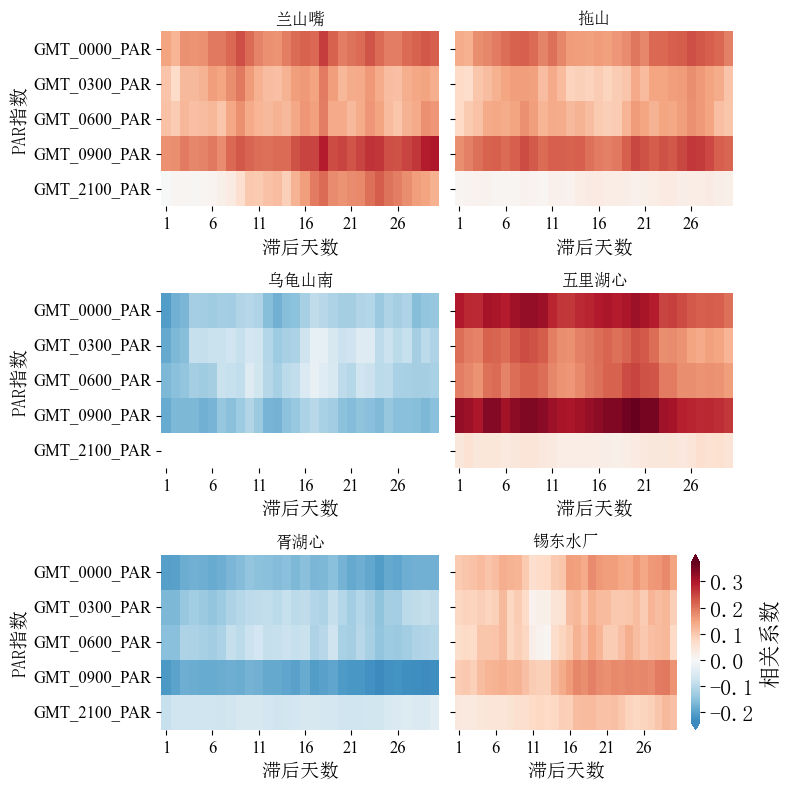

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 分别设置中英文字体,并设置较大字号
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=16)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=16)

# 定义所有站点名称和对应的日期
station_names = ["兰山嘴", "拖山", "乌龟山南", "五里湖心", "胥湖心", "锡东水厂"]
file_dates = ["20241027", "20241104", "20241122", "20241125", "20241123", "20241124"]

print("绘制各站点PAR指数与藻密度的滞后相关性热力图")

# 创建一个大图,包含6个子图
fig, axes = plt.subplots(3, 2, figsize=(8, 8))
axes = axes.flatten()

# 遍历每个站点
for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates)):
    # 读取CSV文件
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    # 读取两个CSV文件并合并
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    df['date'] = pd.to_datetime(df['date'])
    
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 合并数据集
    merged_df = pd.merge(df, station_df, on='date', how='left')

    # 定义遥感指数和波段变量
    rs_vars = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR', 'GMT_2100_PAR']
    env_vars = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']

    # 计算滞后相关性
    max_lag = 30  # 最大滞后天数

    # 遥感指数的滞后相关性分析
    rs_lag_correlations = {}
    for var in rs_vars:
        lag_corrs = []
        for lag in range(1, max_lag + 1):
            lagged_corr = merged_df[var].shift(lag).corr(merged_df['density'])
            lag_corrs.append(lagged_corr)
        rs_lag_correlations[var] = lag_corrs

    # 绘制遥感指数滞后相关性热力图
    rs_lag_data = pd.DataFrame(rs_lag_correlations, index=range(1, max_lag + 1))
    
    # 找出所有子图的最大最小值范围
    vmin = float('inf')
    vmax = float('-inf')
    for i, (station_name, file_date) in enumerate(zip(station_names, file_dates)):
        # 读取CSV文件
        file_station_name = station_name
        if station_name == "兰山嘴":
            file_station_name = "lanshanzui"
        elif station_name == "拖山":
            file_station_name = "tuoshan"
            
        # 读取两个CSV文件并合并
        df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
        df['date'] = pd.to_datetime(df['date'])
        
        station_df = pd.read_csv(f'001-{file_station_name}.csv')
        station_df['date'] = pd.to_datetime(station_df['date'])
        
        # 合并数据集
        merged_df = pd.merge(df, station_df, on='date', how='left')

        # 计算每个站点的滞后相关性
        rs_lag_correlations_temp = {}
        for var in rs_vars:
            lag_corrs = []
            for lag in range(1, max_lag + 1):
                lagged_corr = merged_df[var].shift(lag).corr(merged_df['density'])
                lag_corrs.append(lagged_corr)
            rs_lag_correlations_temp[var] = lag_corrs
            
        df_temp = pd.DataFrame(rs_lag_correlations_temp, index=range(1, max_lag + 1))
        vmin = min(vmin, df_temp.min().min())
        vmax = max(vmax, df_temp.max().max())
    
    # 绘制热力图,不显示colorbar
    heatmap = sns.heatmap(rs_lag_data.T, cmap='RdBu_r', center=0,
                xticklabels=5,
                cbar=False if idx < 5 else True,  # 只在最后一个子图显示colorbar
                vmin=vmin, vmax=vmax,  # 统一colorbar范围
                cbar_kws={'label': '相关系数', 'extend': 'both'} if idx == 5 else None,
                ax=axes[idx])
    
    # 只为最后一个图设置colorbar
    if idx == 5:
        cbar = heatmap.collections[0].colorbar
        cbar.ax.tick_params(labelsize=8)
        cbar.ax.set_ylabel('相关系数', fontproperties=chinese_font)
        # 增加colorbar的长度
        cbar.ax.set_position([cbar.ax.get_position().x0, 
                            cbar.ax.get_position().y0 - 0.1,
                            cbar.ax.get_position().width,
                            cbar.ax.get_position().height + 0.2])
        for label in cbar.ax.get_yticklabels():
            label.set_fontproperties(chinese_font)
    
    # axes[idx].set_title(f'{station_name}', fontproperties=chinese_font, fontsize=12)
    axes[idx].set_title(station_names[idx], fontproperties=chinese_font, fontsize=12)
    axes[idx].set_xlabel('滞后天数', fontproperties=chinese_font, fontsize=14)
    
    # 只为左侧列设置ylabel和y轴刻度
    if idx % 2 == 0:  # 左侧列
        axes[idx].set_ylabel('PAR指数', fontproperties=chinese_font, fontsize=14)
        for label in axes[idx].get_yticklabels():
            label.set_fontproperties(english_font)
            label.set_fontsize(12)  # 调大y轴刻度字号
    else:  # 右侧列
        axes[idx].set_ylabel('')
        axes[idx].set_yticklabels([])
    
    # 设置x轴刻度字体
    for label in axes[idx].get_xticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(12)  # 调大x轴刻度字号

plt.tight_layout()
plt.show()

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()


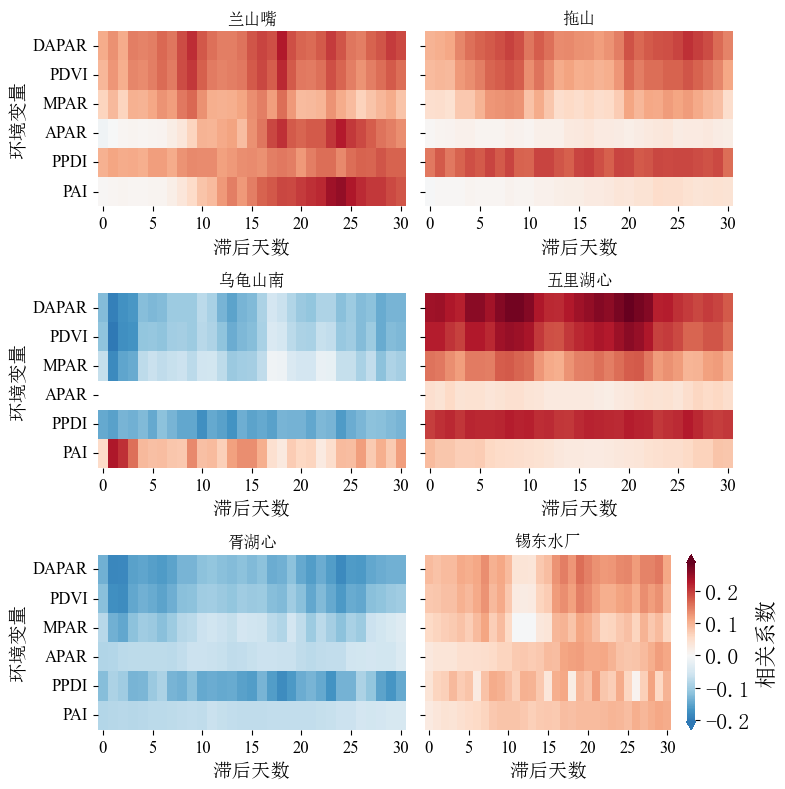

In [8]:
# 创建一个大图,包含6个子图
fig, axes = plt.subplots(3, 2, figsize=(8, 8))
axes = axes.flatten()

# 找出所有子图的最大最小值范围
vmin = float('inf')
vmax = float('-inf')
for i, (station_name, file_date) in enumerate(zip(station_names, file_dates)):
    # 读取CSV文件
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    # 读取两个CSV文件并合并
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    df['date'] = pd.to_datetime(df['date'])
    
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 合并数据集
    merged_df = pd.merge(df, station_df, on='date', how='left')

    # 计算环境变量的滞后相关性
    env_lag_correlations = {}
    for var in env_vars:
        lag_corrs = []
        for lag in range(1, max_lag + 1):
            # 对每一天的滞后进行计算
            lagged_data = merged_df[var].shift(lag)
            lagged_corr = lagged_data.corr(merged_df['density'])
            lag_corrs.append(lagged_corr)
        env_lag_correlations[var] = lag_corrs

    env_lag_data = pd.DataFrame(env_lag_correlations, index=range(1, max_lag + 1))
    vmin = min(vmin, env_lag_data.min().min())
    vmax = max(vmax, env_lag_data.max().max())

# 遍历每个站点绘制热力图
for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates)):
    # 读取CSV文件
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    # 读取两个CSV文件并合并
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    df['date'] = pd.to_datetime(df['date'])
    
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 合并数据集
    merged_df = pd.merge(df, station_df, on='date', how='left')
    # 计算环境变量的滞后相关性
    env_lag_correlations = {}
    for var in env_vars:
        lag_corrs = []
        for lag in range(0, 31):  # 计算0~30天的滞后
            # 对每一天的滞后进行计算
            lagged_data = merged_df[var].shift(lag)
            lagged_corr = lagged_data.corr(merged_df['density'])
            lag_corrs.append(lagged_corr)
        env_lag_correlations[var] = lag_corrs

    env_lag_data = pd.DataFrame(env_lag_correlations, index=range(0, 31))
    
    # 绘制热力图
    heatmap = sns.heatmap(env_lag_data.T, cmap='RdBu_r', center=0,
                xticklabels=5,
                cbar=False if idx < 5 else True,  # 只在最后一个子图显示colorbar
                vmin=vmin, vmax=vmax,  # 统一colorbar范围
                cbar_kws={'label': '相关系数', 'extend': 'both'} if idx == 5 else None,
                ax=axes[idx])
    
    # 只为最后一个图设置colorbar
    if idx == 5:
        cbar = heatmap.collections[0].colorbar
        cbar.ax.tick_params(labelsize=8)
        cbar.ax.set_ylabel('相关系数', fontproperties=chinese_font)
        cbar.ax.set_position([cbar.ax.get_position().x0, 
                            cbar.ax.get_position().y0 - 0.1,
                            cbar.ax.get_position().width,
                            cbar.ax.get_position().height + 0.2])
        for label in cbar.ax.get_yticklabels():
            label.set_fontproperties(chinese_font)
    
    axes[idx].set_title(f'{station_name}', fontproperties=chinese_font, fontsize=12)
    axes[idx].set_xlabel('滞后天数', fontproperties=chinese_font, fontsize=14)
    
    # 只为左侧列设置ylabel和y轴刻度
    if idx % 2 == 0:  # 左侧列
        axes[idx].set_ylabel('环境变量', fontproperties=chinese_font, fontsize=14)
        for label in axes[idx].get_yticklabels():
            label.set_fontproperties(english_font)
            label.set_fontsize(12)
    else:  # 右侧列
        axes[idx].set_ylabel('')
        axes[idx].set_yticklabels([])
    
    # 设置x轴刻度字体
    for label in axes[idx].get_xticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(12)

plt.tight_layout()
plt.show()

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22068 (\N{CJK UNIFIED IDEOGRAPH-5634}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25302 (\N{CJK UNIFIED IDEOGRAPH-62D6}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

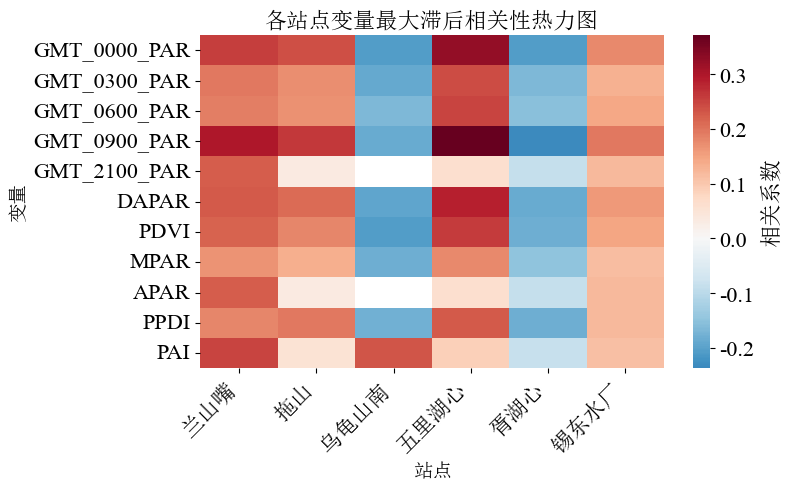

In [9]:
# 创建一个包含所有站点最大滞后相关性的字典
all_stations_correlations = {}

# 遍历每个站点
for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates)):
    # 读取CSV文件
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    # 读取两个CSV文件并合并
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    df['date'] = pd.to_datetime(df['date'])
    
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 合并数据集
    merged_df = pd.merge(df, station_df, on='date', how='left')
    
    # 计算每个变量的最大滞后相关性
    station_correlations = {}
    
    # PAR指数
    for var in rs_vars:
        max_corr = max([merged_df[var].shift(i).corr(merged_df['density']) 
                       for i in range(31)], key=abs)
        station_correlations[var] = max_corr
        
    # 环境变量
    for var in env_vars:
        max_corr = max([merged_df[var].shift(i).corr(merged_df['density']) 
                       for i in range(31)], key=abs)
        station_correlations[var] = max_corr
        
    all_stations_correlations[station_name] = station_correlations

# 创建热力图数据矩阵
variables = rs_vars + env_vars
stations = list(all_stations_correlations.keys())
correlation_matrix = np.zeros((len(variables), len(stations)))

for i, var in enumerate(variables):
    for j, station in enumerate(stations):
        correlation_matrix[i,j] = all_stations_correlations[station][var]

# 绘制热力图
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, 
            xticklabels=stations,
            yticklabels=variables,
            cmap='RdBu_r',
            center=0,
            cbar_kws={'label': '相关系数'})

plt.title('各站点变量最大滞后相关性热力图', fontproperties=chinese_font, fontsize=16)
plt.xlabel('站点', fontproperties=chinese_font, fontsize=14)
plt.ylabel('变量', fontproperties=chinese_font, fontsize=14)

# 设置刻度字体
ax = plt.gca()
plt.xticks(rotation=45, ha='right')
for label in ax.get_xticklabels():
    label.set_fontproperties(chinese_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(english_font)
# 设置colorbar刻度字体
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('相关系数', fontproperties=chinese_font)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(english_font)

plt.tight_layout()
plt.show()

绘制各站点PAR指数与叶绿素的滞后相关性热力图


/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()


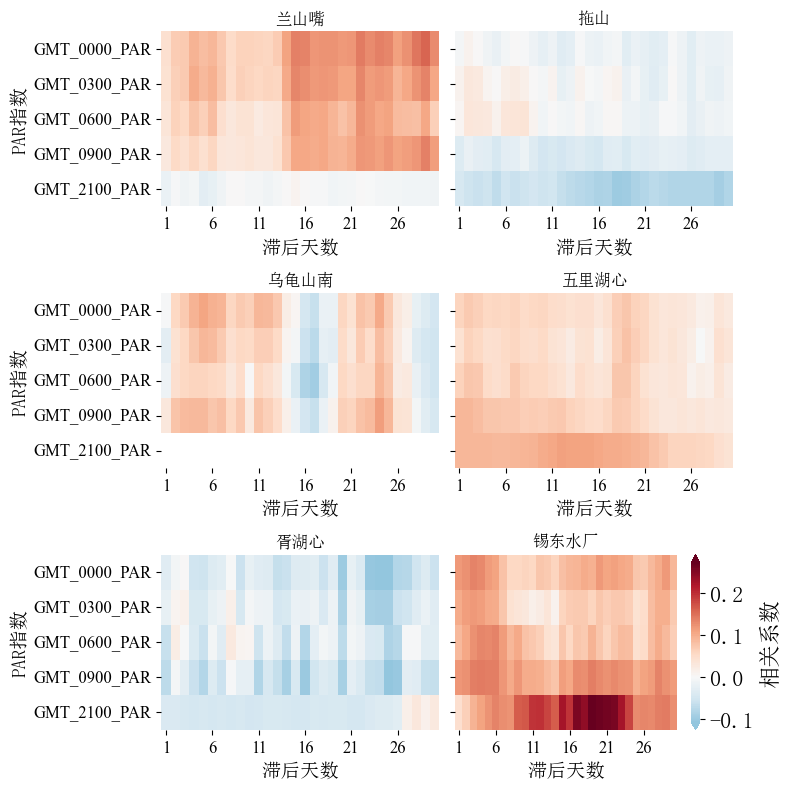

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 分别设置中英文字体,并设置较大字号
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=16)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=16)

# 定义所有站点名称和对应的日期
station_names = ["兰山嘴", "拖山", "乌龟山南", "五里湖心", "胥湖心", "锡东水厂"]
file_dates = ["20241027", "20241104", "20241122", "20241125", "20241123", "20241124"]

print("绘制各站点PAR指数与叶绿素的滞后相关性热力图")

# 创建一个大图,包含6个子图
fig, axes = plt.subplots(3, 2, figsize=(8, 8))
axes = axes.flatten()

# 遍历每个站点
for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates)):
    # 读取CSV文件
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    # 读取两个CSV文件并合并
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    df['date'] = pd.to_datetime(df['date'])
    
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 合并数据集
    merged_df = pd.merge(df, station_df, on='date', how='left')

    # 定义遥感指数和波段变量
    rs_vars = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR', 'GMT_2100_PAR']
    env_vars = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']

    # 计算滞后相关性
    max_lag = 30  # 最大滞后天数

    # 遥感指数的滞后相关性分析
    rs_lag_correlations = {}
    for var in rs_vars:
        lag_corrs = []
        for lag in range(1, max_lag + 1):
            lagged_corr = merged_df[var].shift(lag).corr(merged_df['chla'])
            lag_corrs.append(lagged_corr)
        rs_lag_correlations[var] = lag_corrs

    # 绘制遥感指数滞后相关性热力图
    rs_lag_data = pd.DataFrame(rs_lag_correlations, index=range(1, max_lag + 1))
    
    # 找出所有子图的最大最小值范围
    vmin = float('inf')
    vmax = float('-inf')
    for i, (station_name, file_date) in enumerate(zip(station_names, file_dates)):
        # 读取CSV文件
        file_station_name = station_name
        if station_name == "兰山嘴":
            file_station_name = "lanshanzui"
        elif station_name == "拖山":
            file_station_name = "tuoshan"
            
        # 读取两个CSV文件并合并
        df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
        df['date'] = pd.to_datetime(df['date'])
        
        station_df = pd.read_csv(f'001-{file_station_name}.csv')
        station_df['date'] = pd.to_datetime(station_df['date'])
        
        # 合并数据集
        merged_df = pd.merge(df, station_df, on='date', how='left')

        # 计算每个站点的滞后相关性
        rs_lag_correlations_temp = {}
        for var in rs_vars:
            lag_corrs = []
            for lag in range(1, max_lag + 1):
                lagged_corr = merged_df[var].shift(lag).corr(merged_df['chla'])
                lag_corrs.append(lagged_corr)
            rs_lag_correlations_temp[var] = lag_corrs
            
        df_temp = pd.DataFrame(rs_lag_correlations_temp, index=range(1, max_lag + 1))
        vmin = min(vmin, df_temp.min().min())
        vmax = max(vmax, df_temp.max().max())
    
    # 绘制热力图,不显示colorbar
    heatmap = sns.heatmap(rs_lag_data.T, cmap='RdBu_r', center=0,
                xticklabels=5,
                cbar=False if idx < 5 else True,  # 只在最后一个子图显示colorbar
                vmin=vmin, vmax=vmax,  # 统一colorbar范围
                cbar_kws={'label': '相关系数', 'extend': 'both'} if idx == 5 else None,
                ax=axes[idx])
    
    # 只为最后一个图设置colorbar
    if idx == 5:
        cbar = heatmap.collections[0].colorbar
        cbar.ax.tick_params(labelsize=8)
        cbar.ax.set_ylabel('相关系数', fontproperties=chinese_font)
        # 增加colorbar的长度
        cbar.ax.set_position([cbar.ax.get_position().x0, 
                            cbar.ax.get_position().y0 - 0.1,
                            cbar.ax.get_position().width,
                            cbar.ax.get_position().height + 0.2])
        for label in cbar.ax.get_yticklabels():
            label.set_fontproperties(chinese_font)
    
    # 设置每个子图的标题为对应的站点名称
    axes[idx].set_title(station_names[idx], fontproperties=chinese_font, fontsize=12)
    axes[idx].set_xlabel('滞后天数', fontproperties=chinese_font, fontsize=14)
    
    # 只为左侧列设置ylabel和y轴刻度
    if idx % 2 == 0:  # 左侧列
        axes[idx].set_ylabel('PAR指数', fontproperties=chinese_font, fontsize=14)
        for label in axes[idx].get_yticklabels():
            label.set_fontproperties(english_font)
            label.set_fontsize(12)  # 调大y轴刻度字号
    else:  # 右侧列
        axes[idx].set_ylabel('')
        axes[idx].set_yticklabels([])
    
    # 设置x轴刻度字体
    for label in axes[idx].get_xticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(12)  # 调大x轴刻度字号

plt.tight_layout()
plt.show()

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()


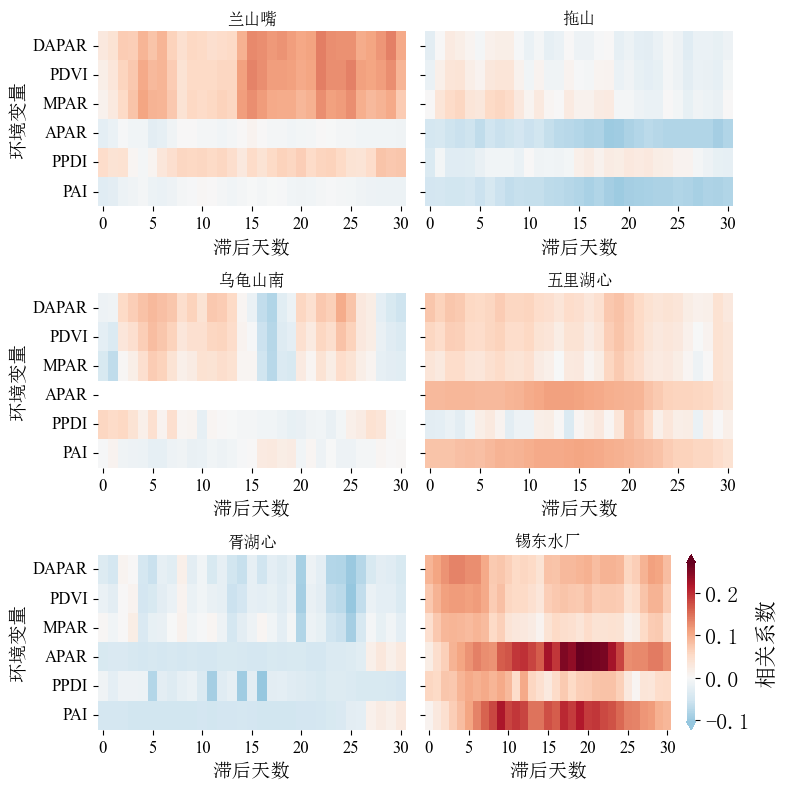

In [11]:
# 创建一个大图,包含6个子图
fig, axes = plt.subplots(3, 2, figsize=(8, 8))
axes = axes.flatten()

# 找出所有子图的最大最小值范围
vmin = float('inf')
vmax = float('-inf')
for i, (station_name, file_date) in enumerate(zip(station_names, file_dates)):
    # 读取CSV文件
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    # 读取两个CSV文件并合并
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    df['date'] = pd.to_datetime(df['date'])
    
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 合并数据集
    merged_df = pd.merge(df, station_df, on='date', how='left')

    # 计算环境变量的滞后相关性
    env_lag_correlations = {}
    for var in env_vars:
        lag_corrs = []
        for lag in range(1, max_lag + 1):
            # 对每一天的滞后进行计算
            lagged_data = merged_df[var].shift(lag)
            lagged_corr = lagged_data.corr(merged_df['chla'])
            lag_corrs.append(lagged_corr)
        env_lag_correlations[var] = lag_corrs

    env_lag_data = pd.DataFrame(env_lag_correlations, index=range(1, max_lag + 1))
    vmin = min(vmin, env_lag_data.min().min())
    vmax = max(vmax, env_lag_data.max().max())

# 遍历每个站点绘制热力图
for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates)):
    # 读取CSV文件
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    # 读取两个CSV文件并合并
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    df['date'] = pd.to_datetime(df['date'])
    
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 合并数据集
    merged_df = pd.merge(df, station_df, on='date', how='left')
    # 计算环境变量的滞后相关性
    env_lag_correlations = {}
    for var in env_vars:
        lag_corrs = []
        for lag in range(0, 31):  # 计算0~30天的滞后
            # 对每一天的滞后进行计算
            lagged_data = merged_df[var].shift(lag)
            lagged_corr = lagged_data.corr(merged_df['chla'])
            lag_corrs.append(lagged_corr)
        env_lag_correlations[var] = lag_corrs

    env_lag_data = pd.DataFrame(env_lag_correlations, index=range(0, 31))
    
    # 绘制热力图
    heatmap = sns.heatmap(env_lag_data.T, cmap='RdBu_r', center=0,
                xticklabels=5,
                cbar=False if idx < 5 else True,  # 只在最后一个子图显示colorbar
                vmin=vmin, vmax=vmax,  # 统一colorbar范围
                cbar_kws={'label': '相关系数', 'extend': 'both'} if idx == 5 else None,
                ax=axes[idx])
    
    # 只为最后一个图设置colorbar
    if idx == 5:
        cbar = heatmap.collections[0].colorbar
        cbar.ax.tick_params(labelsize=8)
        cbar.ax.set_ylabel('相关系数', fontproperties=chinese_font)
        cbar.ax.set_position([cbar.ax.get_position().x0, 
                            cbar.ax.get_position().y0 - 0.1,
                            cbar.ax.get_position().width,
                            cbar.ax.get_position().height + 0.2])
        for label in cbar.ax.get_yticklabels():
            label.set_fontproperties(chinese_font)
    
    axes[idx].set_title(f'{station_name}', fontproperties=chinese_font, fontsize=12)
    axes[idx].set_xlabel('滞后天数', fontproperties=chinese_font, fontsize=14)
    
    # 只为左侧列设置ylabel和y轴刻度
    if idx % 2 == 0:  # 左侧列
        axes[idx].set_ylabel('环境变量', fontproperties=chinese_font, fontsize=14)
        for label in axes[idx].get_yticklabels():
            label.set_fontproperties(english_font)
            label.set_fontsize(12)
    else:  # 右侧列
        axes[idx].set_ylabel('')
        axes[idx].set_yticklabels([])
    
    # 设置x轴刻度字体
    for label in axes[idx].get_xticklabels():
        label.set_fontproperties(english_font)
        label.set_fontsize(12)

plt.tight_layout()
plt.show()

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22068 (\N{CJK UNIFIED IDEOGRAPH-5634}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25302 (\N{CJK UNIFIED IDEOGRAPH-62D6}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

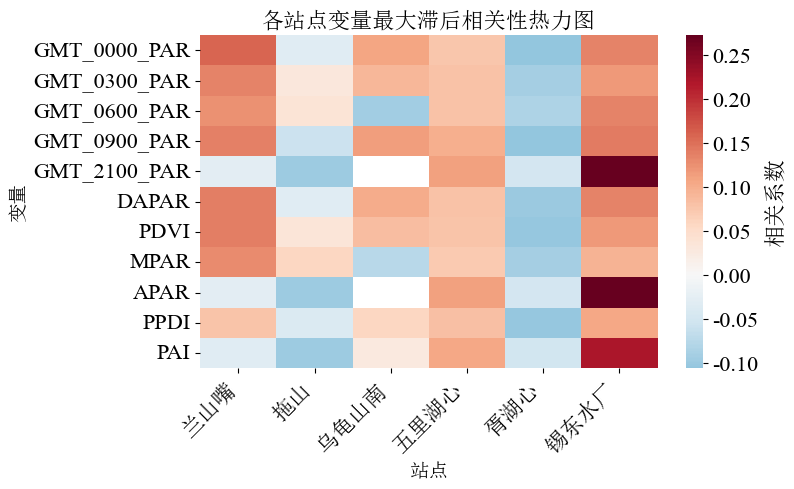

In [12]:
# 创建一个包含所有站点最大滞后相关性的字典
all_stations_correlations = {}

# 遍历每个站点
for idx, (station_name, file_date) in enumerate(zip(station_names, file_dates)):
    # 读取CSV文件
    file_station_name = station_name
    if station_name == "兰山嘴":
        file_station_name = "lanshanzui"
    elif station_name == "拖山":
        file_station_name = "tuoshan"
        
    # 读取两个CSV文件并合并
    df = pd.read_csv(f'003-MCD18C2_061_{file_date}_插值填充_{file_station_name}.csv')
    df['date'] = pd.to_datetime(df['date'])
    
    station_df = pd.read_csv(f'001-{file_station_name}.csv')
    station_df['date'] = pd.to_datetime(station_df['date'])
    
    # 合并数据集
    merged_df = pd.merge(df, station_df, on='date', how='left')
    
    # 计算每个变量的最大滞后相关性
    station_correlations = {}
    
    # PAR指数
    for var in rs_vars:
        max_corr = max([merged_df[var].shift(i).corr(merged_df['chla']) 
                       for i in range(31)], key=abs)
        station_correlations[var] = max_corr
        
    # 环境变量
    for var in env_vars:
        max_corr = max([merged_df[var].shift(i).corr(merged_df['chla']) 
                       for i in range(31)], key=abs)
        station_correlations[var] = max_corr
        
    all_stations_correlations[station_name] = station_correlations

# 创建热力图数据矩阵
variables = rs_vars + env_vars
stations = list(all_stations_correlations.keys())
correlation_matrix = np.zeros((len(variables), len(stations)))

for i, var in enumerate(variables):
    for j, station in enumerate(stations):
        correlation_matrix[i,j] = all_stations_correlations[station][var]

# 绘制热力图
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, 
            xticklabels=stations,
            yticklabels=variables,
            cmap='RdBu_r',
            center=0,
            cbar_kws={'label': '相关系数'})

plt.title('各站点变量最大滞后相关性热力图', fontproperties=chinese_font, fontsize=16)
plt.xlabel('站点', fontproperties=chinese_font, fontsize=14)
plt.ylabel('变量', fontproperties=chinese_font, fontsize=14)

# 设置刻度字体
ax = plt.gca()
plt.xticks(rotation=45, ha='right')
for label in ax.get_xticklabels():
    label.set_fontproperties(chinese_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(english_font)
# 设置colorbar刻度字体
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('相关系数', fontproperties=chinese_font)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(english_font)

plt.tight_layout()
plt.show()